<a href="https://colab.research.google.com/github/eugeniaring/machine-learning-course-eugenia/blob/main/7_dim_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist

## import dataset

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X.shape

(60000, 784)

In [ ]:
y = y_train

In [ ]:
print('Shape di X: ',X.shape)
print('Shape di y: ',y.shape)

Shape di X:  (60000, 784)
Shape di y:  (60000,)


In [ ]:
import matplotlib.pyplot as plt

4


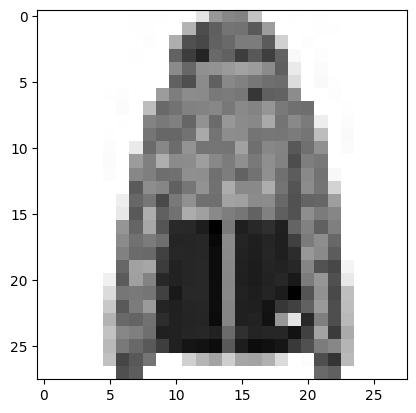

In [ ]:
n = 22
print(y[n])
plt.imshow(X[n].reshape(X_train.shape[1],X_train.shape[2]),cmap=plt.cm.binary)
plt.show()

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [ ]:
class_names = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
print(len(class_names))

10


In [ ]:
import numpy as np

In [ ]:
y[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

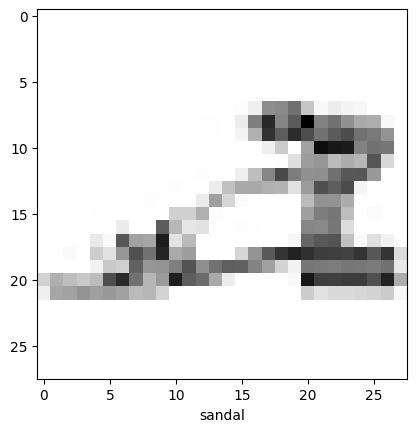

In [ ]:
rand_image_index = np.random.randint(0,y.shape[0])
plt.imshow(X[rand_image_index].reshape(X_train.shape[1],X_train.shape[2]),cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[rand_image_index]])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
X[0].min(), X[0].max()

(0, 255)

In [ ]:
X_std[0].min(), X_std[0].max()

(-1.9222308239853982, 4.205628133086459)

## decidere numero di componenti per la PCA

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px

In [ ]:
pca = PCA(n_components = 20)
components = pca.fit_transform(X_std)

In [ ]:
pca.explained_variance_ratio_

array([0.22083547, 0.14414633, 0.05461176, 0.05088686, 0.04054887,
       0.03019511, 0.02747539, 0.02313654, 0.01692637, 0.01318043,
       0.01170103, 0.00962364, 0.00906441, 0.00861004, 0.00743004,
       0.0073031 , 0.00661526, 0.00631495, 0.00621866, 0.00584142])

In [ ]:
pca.explained_variance_ratio_.sum()

0.7006656927211423

In [ ]:
pca.explained_variance_.sum()

549.3310586110206

In [ ]:
list_components = range(1,50)
l_var = []
for c in list_components:
    pca = PCA(n_components = c)
    components = pca.fit_transform(X_std)
    total_var = pca.explained_variance_ratio_.sum()*100
    l_var.append(total_var)
    print('{} componenti: {} %'.format(c,total_var))

1 componenti: 22.08354729708184 %
2 componenti: 36.49817991070237 %
3 componenti: 41.959356302992994 %
4 componenti: 47.0480419921972 %
5 componenti: 51.102928510033784 %
6 componenti: 54.12243996321535 %
7 componenti: 56.8699792493762 %
8 componenti: 59.183632885056255 %
9 componenti: 60.87626996537959 %
10 componenti: 62.194313389513475 %
11 componenti: 63.36441408654168 %
12 componenti: 64.32677200618674 %
13 componenti: 65.23317165052717 %
14 componenti: 66.09412491218401 %
15 componenti: 66.83713756635427 %
16 componenti: 67.56732008470172 %
17 componenti: 68.22888773009159 %
18 componenti: 68.85981326977392 %
19 componenti: 69.48214409058504 %
20 componenti: 70.06657871352398 %
21 componenti: 70.59000207594353 %
22 componenti: 71.10043760638418 %
23 componenti: 71.57412678295827 %
24 componenti: 72.02243874036964 %
25 componenti: 72.46104903050036 %
26 componenti: 72.87710658671902 %
27 componenti: 73.27582135927213 %
28 componenti: 73.6610143046496 %
29 componenti: 74.0439752238

KeyboardInterrupt: ignored

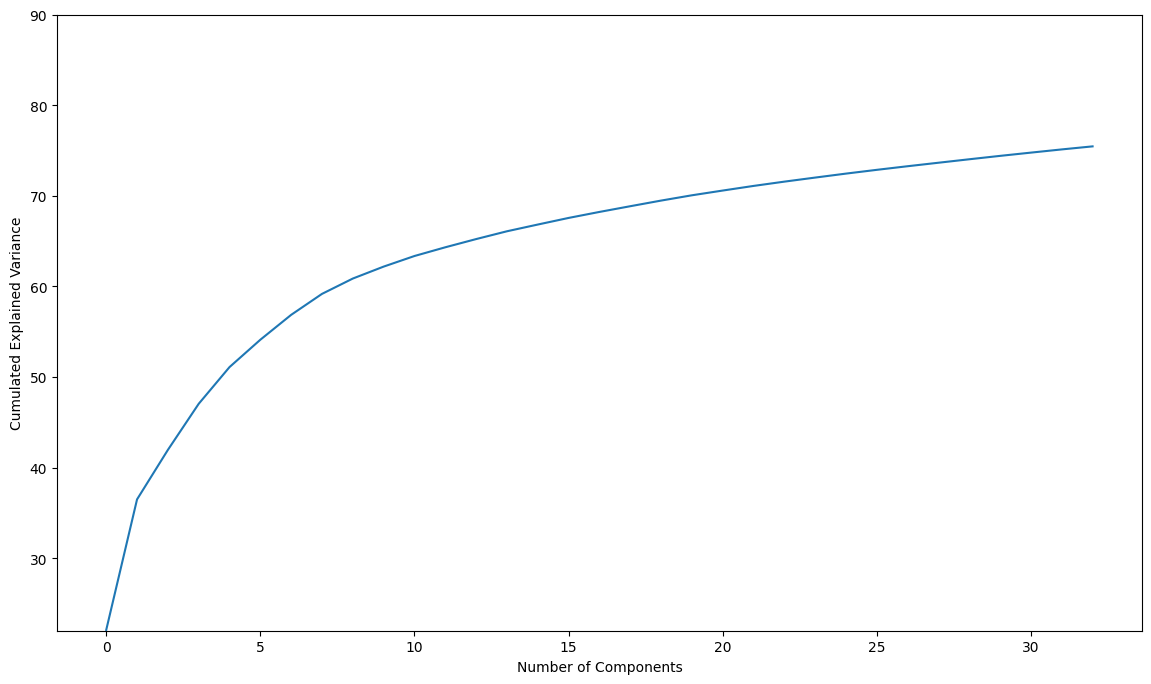

In [ ]:
 plt.figure(figsize=(14,8))
 plt.plot(l_var)
 plt.xlabel('Number of Components')
 plt.ylabel('Cumulated Explained Variance')
 plt.ylim((22,90))
 plt.show()

In [ ]:
len(l_var)

33

## PCA

In [ ]:
pca = PCA(n_components=32)
components = pca.fit_transform(X_std)

In [ ]:
tot_var = pca.explained_variance_ratio_.sum()*100
tot_var

75.12873559714517

In [ ]:
pca.explained_variance_ratio_

array([0.22083547, 0.14414633, 0.05461176, 0.05088686, 0.04054887,
       0.03019511, 0.02747539, 0.02313654, 0.01692637, 0.01318043,
       0.01170103, 0.00962364, 0.00906441, 0.00861006, 0.00743008,
       0.00730325, 0.00661557, 0.00631514, 0.00621938, 0.0058428 ,
       0.00523383, 0.00511112, 0.00473503, 0.00449814, 0.00438611,
       0.00416592, 0.00397335, 0.0039016 , 0.00377053, 0.00372312,
       0.00361352, 0.00350657])

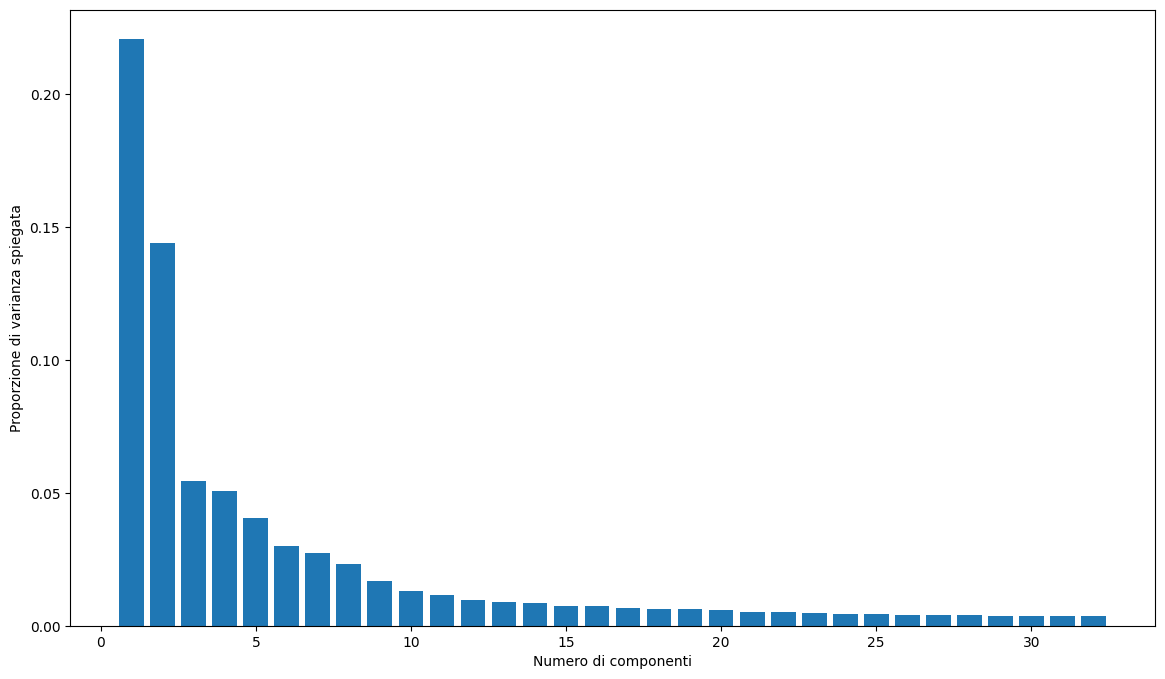

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(range(1,33),pca.explained_variance_ratio_)
plt.xlabel('Numero di componenti')
plt.ylabel('Proporzione di varianza spiegata')
plt.show()

<ipython-input-63-dd28f685acab>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



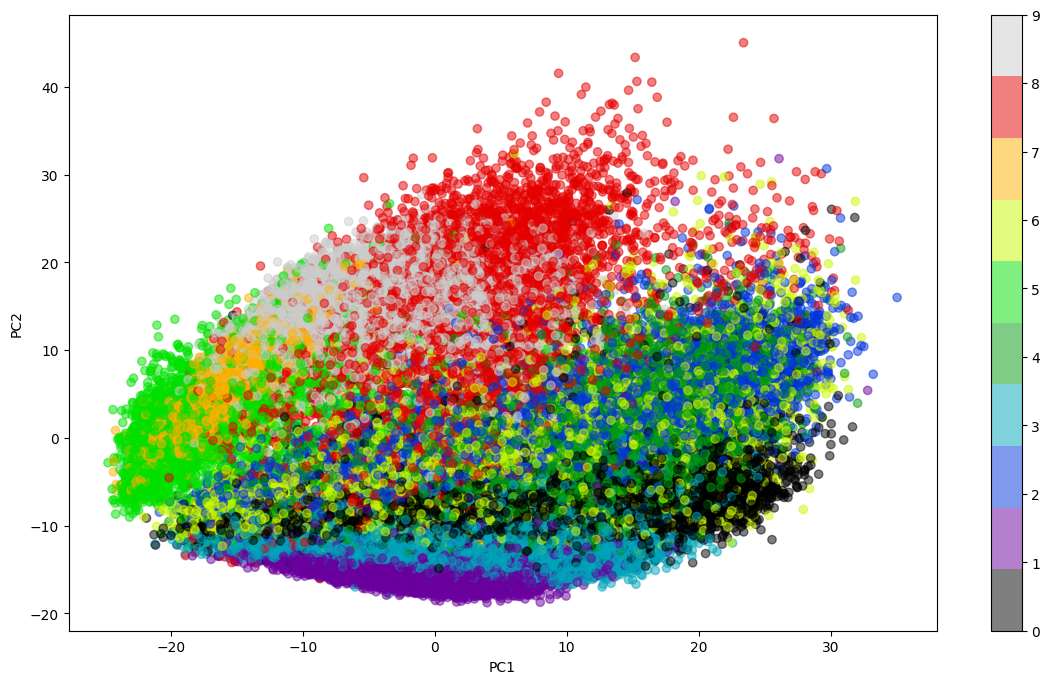

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(components[:,0],components[:,1],c=y,cmap=plt.cm.get_cmap('nipy_spectral',10),alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [ ]:
y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
 y_explained = np.array([class_names[label] for label in y])

In [ ]:
y_explained

array(['ankle boot', 't-shirt', 't-shirt', ..., 'dress', 't-shirt',
       'sandal'], dtype='<U10')

In [ ]:
fig = px.scatter(components,x=0,y=1,color=y_explained,labels={'0':'PC1','1':'PC2'})
fig.show()

In [ ]:
pca.explained_variance_ratio_[:3].sum()*100

41.959356302993385

In [ ]:
fig = px.scatter_3d(components,x=0,y=1,z=2,color=y_explained,title = "{} % ".format(pca.explained_variance_ratio_[:3].sum()*100),labels={'0':'PC1','1':'PC2','2':'PC3'})
fig.show()

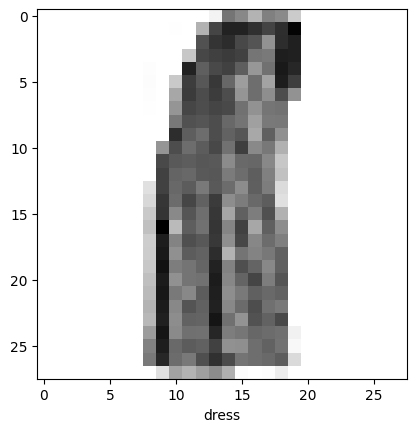

In [ ]:
rand_image_index = np.random.randint(0,y.shape[0])
plt.imshow(X[rand_image_index].reshape(X_train.shape[1],X_train.shape[2]),cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[rand_image_index]])
plt.show()

## k-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,20):
  print('{} Clusters'.format(i))
  kmeans = KMeans(n_clusters=i,random_state=123)
  kmeans.fit(components)
  wcss.append(kmeans.inertia_)

1 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



2 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



3 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



4 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



5 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



6 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



7 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



8 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



9 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



10 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



11 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



12 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



13 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



14 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



15 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



16 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



17 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



18 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



19 Clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



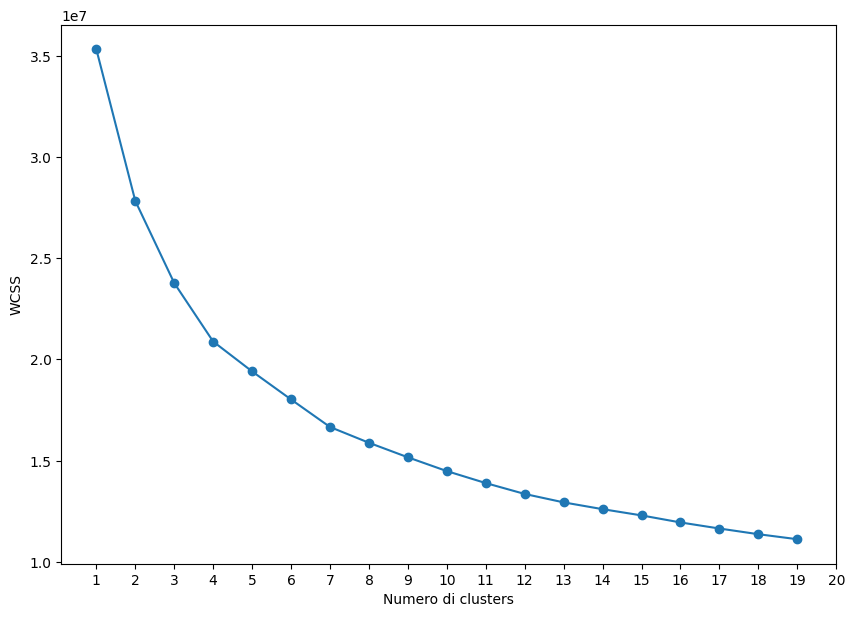

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(1,20),wcss,marker='o')
plt.xlabel('Numero di clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,21))
plt.show()

In [ ]:
len(wcss)

19

In [ ]:
wcss[18]

11109997.660169238

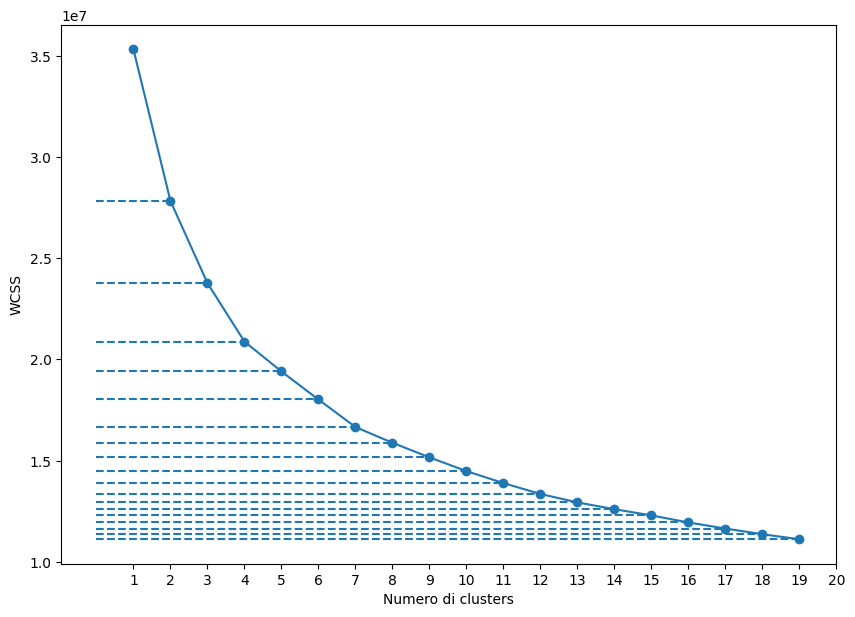

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(1,20),wcss,marker='o')

for i in range(1,19):
  plt.hlines(y=wcss[i],xmin=0,xmax=i+1,linestyles='dashed')

plt.xlabel('Numero di clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,21))
plt.show()

In [ ]:
kmeans7 = KMeans(n_clusters=7,random_state=43)
clusters7 = kmeans7.fit_predict(components)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
fig = px.scatter(components,x=0,y=1,color =clusters7)
fig.show()

In [ ]:
class_names

['t-shirt',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [ ]:
class_frequencies = np.zeros((7,10))
for cluster in range(7):
   for label in range(10):
       class_frequencies[cluster,label] = np.sum(y[clusters7 == cluster] == label)

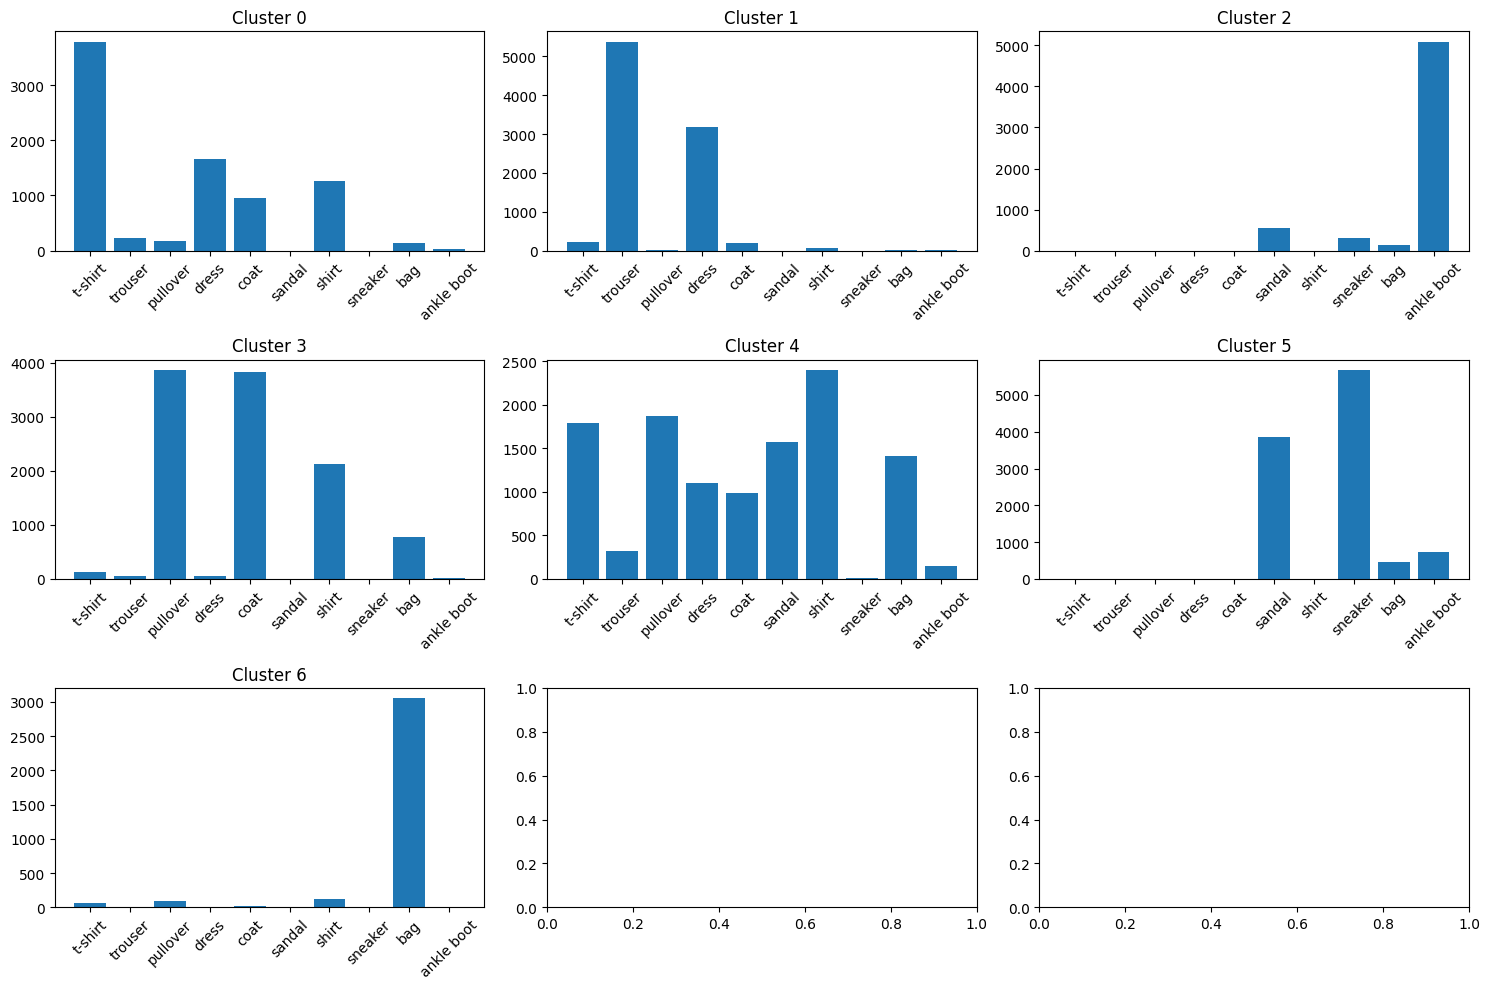

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(15,10))
axes = axes.ravel()

for i in range(7):
   axes[i].bar(class_names,class_frequencies[i,:])
   axes[i].tick_params(axis='x',rotation=45)
   axes[i].set_title('Cluster {}'.format(i))

plt.tight_layout()
plt.show()